# Problem

### 1. 什么是逻辑回归，逻辑回归的推导，损失函数的推导
【参考以前的笔记】

### 2. 逻辑回归与SVM的异同
**相同点**

(1) 都是线性分类器。本质上都是求一个最佳分类超平面；

(2) 都是监督学习算法；

(3) 都是判别模型。通过决策函数，判别输入特征之间的差别来进行分类

常见的判别模型有：KNN、SVM、LR。

常见的生成模型有：朴素贝叶斯，隐马尔可夫模型

**不同点**

(1) 损失函数不同；

LR：
$$J(\theta)=-\frac{1}{m}\left[\sum_{i=1}^my^{(i)}logh_{\theta}\left(x^{(i)}\right)+\left(1-y^i\right)log\left(1-h_{\theta}x^{(i)}\right)\right]$$
SVM:
$$J(\omega,b,\alpha)=\frac{1}{2}\left\|\omega\right\|^2-\sum_{i=1}^n{\alpha}_i\left(y_i\left({\omega}^Tx_i+b\right)-1\right)$$
**逻辑回归基于概率理论**，假设样本为正样本的概率可以用sigmoid函数（S型函数）来表示，然后通过极大似然估计的方法估计出参数的值。

**支持向量机基于几何间隔最大化原理**，认为存在最大几何间隔的分类面为最优分类面。

(2) 两个模型对数据和参数的敏感程度不同

SVM考虑分类边界线附近的样本（决定分类超平面的样本）。**在支持向量外添加或减少任何样本点对分类决策面没有任何影响**；

LR受所有数据点的影响。直接依赖数据分布，**每个样本点都会影响决策面的结果**。如果训练数据不同类别严重不平衡，则一般需要先对数据做平衡处理，让不同类别的样本尽量平衡。

(3) SVM 基于距离分类，LR 基于概率分类；

SVM依赖数据表达的距离测度，所以需要对数据先做normalization；LR不受其影响。

(4) 在解决非线性问题时，支持向量机采用核函数的机制，而LR通常不采用核函数的方法；

SVM算法里，只有少数几个代表支持向量的样本参与分类决策计算，也就是**只有少数几个样本需要参与核函数的计算**。

**LR算法里，每个样本点都必须参与分类决策的计算过程**，也就是说，假设我们在LR里也运用核函数的原理，那么每个样本点都必须参与核计算，这带来的计算复杂度是相当高的。尤其是数据量很大时，我们无法承受。所以，在具体应用时，LR很少运用核函数机制。

(5) 在小规模数据集上，Linear SVM要略好于LR，但差别也不是特别大，而且Linear SVM的计算复杂度受数据量限制，对海量数据LR使用更加广泛；

(6) SVM的损失函数就自带正则，而 LR 必须另外在损失函数之外添加正则项
【参考】https://blog.csdn.net/jieming2002/article/details/79317496

### 3.逻辑回归与线性回归的不同
**相同点**

(1) 两个都是线性模型，线性回归是普通线性模型，逻辑回归是广义线性模型；

(2) 表达形式上，逻辑回归是线性回归套上了一个Sigmoid函数；

(3) 参数估计上，都是用极大似然估计的方法估计参数；

**不同点**

(1) 线性回归优化的目标函数是**均方差(最小二乘)**，而逻辑回归优化的是**似然函数(交叉熵)**;

(2) 线性归回要求自变量与因变量呈线性关系，而逻辑回归没有要求;

(3) 线性回归分析的是因变量自身与自变量的**关系**，而逻辑回归研究的是因变量取值的概率与自变量的**概率**;

(4) 逻辑回归处理的是分类问题，线性回归处理的是回归问题，这也导致了两个模型的取值范围不同：0-1和实数域;

(5) 线性回归假设响应变量服从**正态分布**，逻辑回归假设响应变量服从**伯努利分布**;

(6) 参数估计上，都是用极大似然估计的方法估计参数(高斯分布导致了线性模型损失函数为均方差，伯努利分布导致逻辑回归损失函数为交叉熵)

【参考】https://blog.csdn.net/qq_35290785/article/details/100905063

### 4.为什么LR需要归一化或者取对数，为什么LR把特征离散化后效果更好

(1) 稀疏向量内积乘法运算速度快，计算结果方便存储，容易扩展;

(2) 离散化后的特征对异常数据有很强的鲁棒性：比如一个特征是年龄>30是1，否则0。如果特征没有离散化，一个异常数据“年龄300岁”会给模型造成很大的干扰;

(3) 逻辑回归属于广义线性模型，表达能力受限；单变量离散化为N个后，每个变量有单独的权重，相当于为模型引入了非线性，能够提升模型表达能力，加大拟合;

(4) 离散化后可以进行特征交叉，由$M+N$个变量变为$M*N$个变量，进一步引入非线性，提升表达能力;

(5) 特征离散化后，模型会更稳定，比如如果对用户年龄离散化，20-30作为一个区间，不会因为一个用户年龄长了一岁就变成一个完全不同的人。当然处于区间相邻处的样本会刚好相反，所以怎么划分区间是门学问

【参考】https://blog.csdn.net/yang090510118/article/details/39478033

### 5. LR为什么用Sigmoid函数，这个函数有什么优缺点，为什么不用其他函数

(1) LR的学习目标是**最大化条件似然度**，而sigmoid函数的值域是$(0,1)$，满足概率的要求;

(2) sigmoid函数单调递增；

(3) sigmoid函数(伯努利分布的指数形式)或者说指数函数所具有的最佳性质，即maximum entropy的性质

**ps**: 为什么maximum entropy好呢？熵原本是信息论中的概念，用在概率分布上可以表示这个分布中所包含的**不确定度**，熵越大不确定度越大。可以想象到，均匀分布熵最大，因为基本新数据是任何值的概率都均等。

现在关心的是，给定某些假设之后，熵最大的分布。也就是说这个分布应该在满足我假设的前提下越均匀越好。比如熟知的正态分布，正是假设已知mean和variance后熵最大的分布。

回过来看LR，这里假设了什么呢？首先，我们在建模预测$Y|X$，并认为$Y|X$服从伯努利分布，所以我们只需要知道$P(Y|X)$；其次我们需要一个线性模型，所以 $P(Y|X)=f({\omega}x)$。接下来我们就只需要知道$f$是什么就行了。而我们可以通过最大熵原则推出的这个$f$，就是sigmoid函数。

【参考】https://blog.csdn.net/jinesse/article/details/50553870?utm_medium=distribute.pc_relevant_t0.none-task-blog-BlogCommendFromMachineLearnPai2-1.channel_param&depth_1-utm_source=distribute.pc_relevant_t0.none-task-blog-BlogCommendFromMachineLearnPai2-1.channel_param

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
#%matplotlib qt5
import seaborn as sns
import plotly.express as px
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

# demo

In [2]:
##Demo演示LogisticRegression分类

## 构造数据集
x_fearures = np.array([[-1, -2], [-2, -1], [-3, -2], [1, 3], [2, 1], [3, 2]])
y_label = np.array([0, 0, 0, 1, 1, 1])

## 调用逻辑回归模型
lr_clf = LogisticRegression()

## 用逻辑回归模型拟合构造的数据集
lr_clf = lr_clf.fit(x_fearures, y_label) #其拟合方程为 y=w0+w1*x1+w2*x2

In [3]:
##查看其对应模型的w
print('the weight of Logistic Regression:',lr_clf.coef_)
##查看其对应模型的w0
print('the intercept(w0) of Logistic Regression:',lr_clf.intercept_)
##the weight of Logistic Regression:[[0.73462087 0.6947908]]
##the intercept(w0) of Logistic Regression:[-0.03643213]

the weight of Logistic Regression: [[0.73455784 0.69539712]]
the intercept(w0) of Logistic Regression: [-0.13139986]


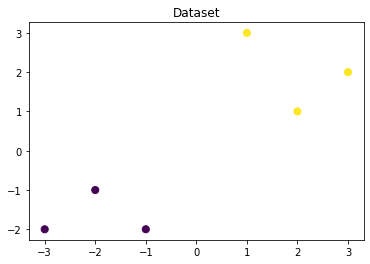

In [4]:
## 可视化构造的数据样本点
plt.figure()
plt.scatter(x_fearures[:,0],x_fearures[:,1], c=y_label, s=50, cmap='viridis')
plt.title('Dataset')
plt.show()

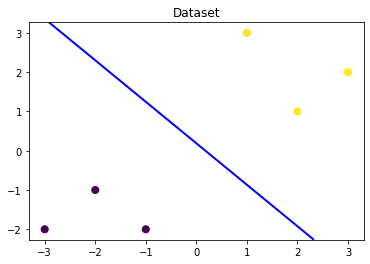

In [6]:
# 可视化决策边界
plt.figure()
plt.scatter(x_fearures[:,0],x_fearures[:,1], c=y_label, s=50, cmap='viridis')
plt.title('Dataset')

nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_grid, y_grid = np.meshgrid(np.linspace(x_min, x_max, nx),np.linspace(y_min, y_max, ny))

#np.r_是按列连接两个矩阵，就是把两矩阵上下相加，要求列数相等
#np.c_是按行连接两个矩阵，就是把两矩阵左右相加，要求行数相等
z_proba = lr_clf.predict_proba(np.c_[x_grid.ravel(), y_grid.ravel()])
z_proba = z_proba[:, 1].reshape(x_grid.shape)
plt.contour(x_grid, y_grid, z_proba, [0.5], linewidths=2., colors='blue')

plt.show()

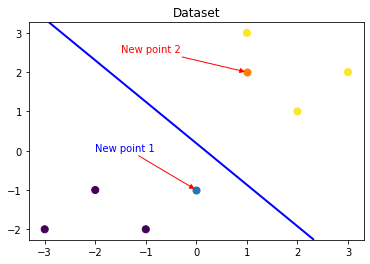

In [11]:
### 可视化预测新样本

plt.figure()
## new point 1
x_fearures_new1 = np.array([[0, -1]])
plt.scatter(x_fearures_new1[:,0],x_fearures_new1[:,1], s=50, cmap='viridis')
plt.annotate(s='New point 1',xy=(0,-1),xytext=(-2,0),color='blue',arrowprops=dict(arrowstyle='-|>',connectionstyle='arc3',color='red'))

## new point 2
x_fearures_new2 = np.array([[1, 2]])
plt.scatter(x_fearures_new2[:,0],x_fearures_new2[:,1], s=50, cmap='viridis')
plt.annotate(s='New point 2',xy=(1,2),xytext=(-1.5,2.5),color='red',arrowprops=dict(arrowstyle='-|>',connectionstyle='arc3',color='red'))

## 训练样本
plt.scatter(x_fearures[:,0],x_fearures[:,1], c=y_label, s=50, cmap='viridis')
plt.title('Dataset')

# 可视化决策边界
plt.contour(x_grid, y_grid, z_proba, [0.5], linewidths=2., colors='blue')

plt.show()

In [12]:
##在训练集和测试集上分布利用训练好的模型进行预测
y_label_new1_predict=lr_clf.predict(x_fearures_new1)
y_label_new2_predict=lr_clf.predict(x_fearures_new2)
print('The New point 1 predict class:\n',y_label_new1_predict)
print('The New point 2 predict class:\n',y_label_new2_predict)
##由于逻辑回归模型是概率预测模型（前文介绍的p = p(y=1|x,\theta)）,所有我们可以利用predict_proba函数预测其概率
y_label_new1_predict_proba=lr_clf.predict_proba(x_fearures_new1)
y_label_new2_predict_proba=lr_clf.predict_proba(x_fearures_new2)
print('The New point 1 predict Probability of each class:\n',y_label_new1_predict_proba)
print('The New point 2 predict Probability of each class:\n',y_label_new2_predict_proba)
##TheNewpoint1predictclass:
##[0]
##TheNewpoint2predictclass:
##[1]
##TheNewpoint1predictProbabilityofeachclass:
##[[0.695677240.30432276]]
##TheNewpoint2predictProbabilityofeachclass:
##[[0.119839360.88016064]]

The New point 1 predict class:
 [0]
The New point 2 predict class:
 [1]
The New point 1 predict Probability of each class:
 [[0.69567724 0.30432276]]
The New point 2 predict Probability of each class:
 [[0.11983936 0.88016064]]


# on iris dataset

In [14]:
##我们利用sklearn中自带的iris数据作为数据载入，并利用Pandas转化为DataFrame格式
from sklearn.datasets import load_iris
data = load_iris() #得到数据特征
iris_target = data.target #得到数据对应的标签
iris_features = pd.DataFrame(data=data.data, columns=data.feature_names) #利用Pandas转化为DataFrame格式

In [17]:
##利用.info()查看数据的整体信息
iris_features.info()

##<class'pandas.core.frame.DataFrame'>
##RangeIndex:150entries,0to149
##Datacolumns(total4columns):
###ColumnNon-NullCountDtype
##----------------------------
##0sepallength(cm)150non-nullfloat64
##1sepalwidth(cm)150non-nullfloat64
##2petallength(cm)150non-nullfloat64
##3petalwidth(cm)150non-nullfloat64
##dtypes:float64(4)
##memoryusage:4.8KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [20]:
##进行简单的数据查看，我们可以利用.head()头部.tail()尾部
iris_features.head()
#iris_features.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
##利用value_counts函数查看每个类别数量

pd.Series(iris_target).value_counts()

##2    50

##1    50

##0    50

##dtype:int64

2    50
1    50
0    50
dtype: int64

In [22]:
##对于特征进行一些统计描述

iris_features.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [23]:
## 合并标签和特征信息
iris_all = iris_features.copy() ##进行浅拷贝，防止对于原始数据的修改
iris_all['target'] = iris_target

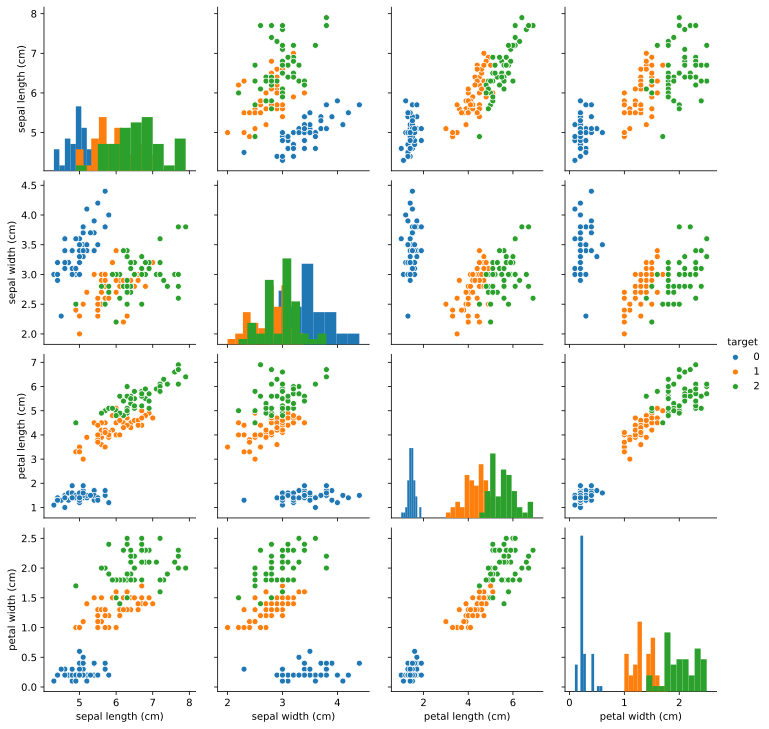

In [24]:
## 特征与标签组合的散点可视化
## 观察在2D情况下不同的特征组合对于不同类别的花的散点分布，以及大概的区分能力。
sns.pairplot(data=iris_all,diag_kind='hist', hue= 'target')
plt.show()

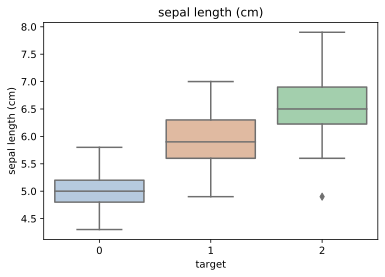

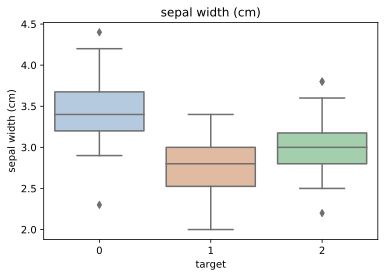

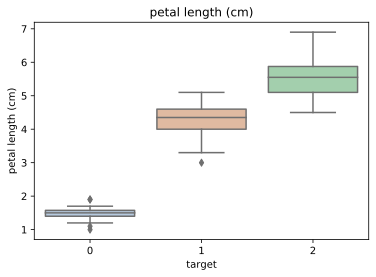

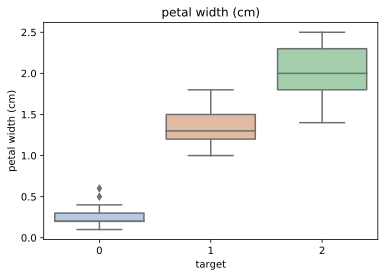

In [25]:
## 利用箱型图可以得到不同类别在不同特征上的分布差异情况
for col in iris_features.columns:
    sns.boxplot(x='target', y=col, saturation=0.5, 
palette='pastel', data=iris_all)
    plt.title(col)
    plt.show()

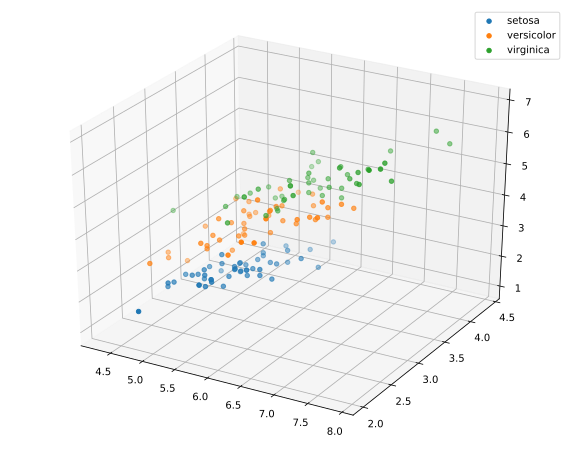

In [26]:
# 选取其前三个特征绘制三维散点图
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

iris_all_class0 = iris_all[iris_all['target']==0].values
iris_all_class1 = iris_all[iris_all['target']==1].values
iris_all_class2 = iris_all[iris_all['target']==2].values
# 'setosa'(0), 'versicolor'(1), 'virginica'(2)
ax.scatter(iris_all_class0[:,0], iris_all_class0[:,1], iris_all_class0[:,2],label='setosa')
ax.scatter(iris_all_class1[:,0], iris_all_class1[:,1], iris_all_class1[:,2],label='versicolor')
ax.scatter(iris_all_class2[:,0], iris_all_class2[:,1], iris_all_class2[:,2],label='virginica')
plt.legend()

plt.show()

# binary

In [27]:
##为了正确评估模型性能，将数据划分为训练集和测试集，并在训练集上训练模型，在测试集上验证模型性能。
from sklearn.model_selection import train_test_split
##选择其类别为0和1的样本（不包括类别为2的样本）
iris_features_part=iris_features.iloc[:100]
iris_target_part=iris_target[:100]
##测试集大小为20%，80%/20%分
x_train,x_test,y_train,y_test=train_test_split(iris_features_part,iris_target_part,test_size=0.2,random_state=2020)

In [28]:
##从sklearn中导入逻辑回归模型
from sklearn.linear_model import LogisticRegression

In [29]:
##定义逻辑回归模型
clf=LogisticRegression(random_state=0,solver='lbfgs')

In [30]:
##在训练集上训练逻辑回归模型
clf.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
##查看其对应的w
print('the weight of Logistic Regression:',clf.coef_)

##查看其对应的w0
print('the intercept(w0) of Logistic Regression:',clf.intercept_)

the weight of Logistic Regression: [[ 0.45181973 -0.81743611  2.14470304  0.89838607]]
the intercept(w0) of Logistic Regression: [-6.53367714]


In [32]:
##查看其对应的w
print('the weight of Logistic Regression:',clf.coef_)

##查看其对应的w0
print('the intercept(w0) of Logistic Regression:',clf.intercept_)

the weight of Logistic Regression: [[ 0.45181973 -0.81743611  2.14470304  0.89838607]]
the intercept(w0) of Logistic Regression: [-6.53367714]


In [33]:
##在训练集和测试集上分布利用训练好的模型进行预测
train_predict=clf.predict(x_train)
test_predict=clf.predict(x_test)

The accuracy of the Logistic Regression is: 1.0
The accuracy of the Logistic Regression is: 1.0
The confusion matrix result:
 [[ 9  0]
 [ 0 11]]


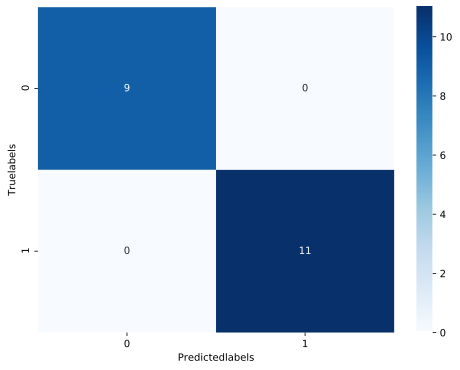

In [34]:
from sklearn import metrics
##利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_train,train_predict))
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_test,test_predict))

##查看混淆矩阵(预测值和真实值的各类情况统计矩阵)
confusion_matrix_result=metrics.confusion_matrix(test_predict,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)

##利用热力图对于结果进行可视化
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix_result,annot=True,cmap='Blues')
plt.xlabel('Predictedlabels')
plt.ylabel('Truelabels')
plt.show()

##The accuracy of the Logistic Regressionis:1.0
##The accuracy of the Logistic Regressionis:1.0
##The confusion matrix result:
##[[9  0]
##[0  11]]

# ternary

In [35]:
##测试集大小为20%，80%/20%分
x_train,x_test,y_train,y_test=train_test_split(iris_features,iris_target,test_size=0.2,random_state=2020)

In [36]:
##定义逻辑回归模型
clf=LogisticRegression(random_state=0,solver='lbfgs')

In [37]:
##在训练集上训练逻辑回归模型
clf.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
##查看其对应的w
print('the weight of Logistic Regression:\n',clf.coef_)
##查看其对应的w0
print('the intercept(w0) of Logistic Regression:\n',clf.intercept_)
##由于这个是3分类，所有我们这里得到了三个逻辑回归模型的参数，其三个逻辑回归组合起来即可实现三分类

the weight of Logistic Regression:
 [[-0.45928925  0.83069883 -2.26606532 -0.9974398 ]
 [ 0.33117319 -0.72863421 -0.06841147 -0.9871103 ]
 [ 0.12811607 -0.10206462  2.3344768   1.9845501 ]]
the intercept(w0) of Logistic Regression:
 [  9.43880687   3.93047363 -13.3692805 ]


In [39]:
##在训练集和测试集上分布利用训练好的模型进行预测
train_predict=clf.predict(x_train)
test_predict=clf.predict(x_test)
##由于逻辑回归模型是概率预测模型（前文介绍的p=p(y=1|x,\theta)）,所有我们可以利用predict_proba函数预测其概率

train_predict_proba=clf.predict_proba(x_train)
test_predict_proba=clf.predict_proba(x_test)

print('The test predict Probability of each class:\n',test_predict_proba)
##其中第一列代表预测为0类的概率，第二列代表预测为1类的概率，第三列代表预测为2类的概率。

##利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_train,train_predict))
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_test,test_predict))

The test predict Probability of each class:
 [[1.03461731e-05 2.33279473e-02 9.76661707e-01]
 [9.69926591e-01 3.00732876e-02 1.21676990e-07]
 [2.09992545e-02 8.69156619e-01 1.09844127e-01]
 [3.61934867e-03 7.91979966e-01 2.04400685e-01]
 [7.90943192e-03 8.00605301e-01 1.91485267e-01]
 [7.30034965e-04 6.60508053e-01 3.38761912e-01]
 [1.68614207e-04 1.86322044e-01 8.13509342e-01]
 [1.06915333e-01 8.90815531e-01 2.26913661e-03]
 [9.46928070e-01 5.30707302e-02 1.20016053e-06]
 [9.62346384e-01 3.76532240e-02 3.91897278e-07]
 [1.19533381e-04 1.38823467e-01 8.61056999e-01]
 [8.78881887e-03 6.97207363e-01 2.94003818e-01]
 [9.73938142e-01 2.60617351e-02 1.22613833e-07]
 [1.78434054e-03 4.79518178e-01 5.18697482e-01]
 [5.56924338e-04 2.46776841e-01 7.52666235e-01]
 [9.83549841e-01 1.64500674e-02 9.13617238e-08]
 [1.65201478e-02 9.54672749e-01 2.88071034e-02]
 [8.99853688e-03 7.82707577e-01 2.08293886e-01]
 [2.98015019e-05 5.45900062e-02 9.45380192e-01]
 [9.35695865e-01 6.43039501e-02 1.85301346e

The confusion matrix result:
 [[10  0  0]
 [ 0  8  2]
 [ 0  2  8]]


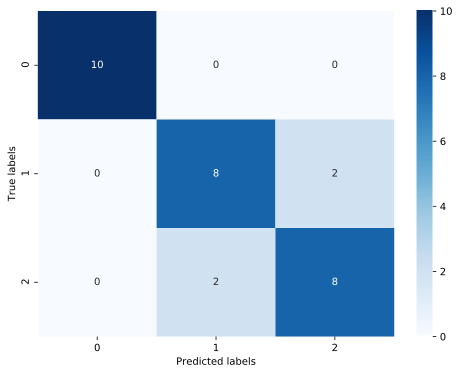

In [40]:
##查看混淆矩阵
confusion_matrix_result=metrics.confusion_matrix(test_predict,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)

##利用热力图对于结果进行可视化
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix_result,annot=True,cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

##The confusion matrix result:
##[[10  0   0]
##[0   8   2] 
##[0   2   8]]

# lr_theory

当z≥0 时,y≥0.5,分类为1，当 z<0时,y<0.5,分类为0，其对应的y值我们可以视为类别1的概率预测值。Logistic回归虽然名字里带“回归”，但是它实际上是一种分类方法，主要用于两分类问题（即输出只有两种，分别代表两个类别），所以利用了Logistic函数（或称为Sigmoid函数），函数形式为：
$$logi(z)=\frac{1}{1+e^{-z}}$$
对应的函数图像可以表示如下:

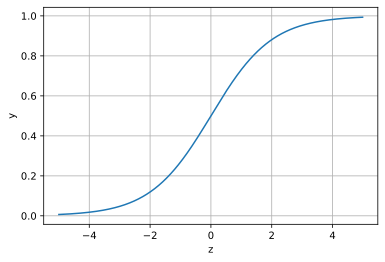

In [42]:
x = np.arange(-5,5,0.01)
y = 1/(1+np.exp(-x))

plt.plot(x,y)
plt.xlabel('z')
plt.ylabel('y')
plt.grid()
plt.show()

通过上图我们可以发现 Logistic 函数是单调递增函数，并且在z=0

将回归方程写入其中为：
$$p=p(y=1|x,\theta)=h_{\theta}(x,\theta)=\frac{1}{1+e^{-({\omega}_0+\sum_{i}^n{\omega}_ix_i)}}$$

所以，$p=p(y=1|x,\theta)=h_{\theta}(x,\theta)$，$p=p(y=0|x,\theta)=1-h_{\theta}(x,\theta)$

逻辑回归从其原理上来说，逻辑回归其实是实现了一个决策边界：对于函数$logi(z)=\frac{1}{1+e^{-z}}$，当z≥0 时,y≥0.5,分类为1，当 z<0时,y<0.5,分类为0，其对应的y值我们可以视为类别1的概率预测值。

对于模型的训练而言：实质上来说就是利用数据求解出对应的模型的特定的$\omega$。从而得到一个针对于当前数据的特征逻辑回归模型。

而对于多分类而言，将多个二分类的逻辑回归组合，即可实现多分类。